**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [ ]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.4.1'

In [ ]:
# To update plotly, uncomment and run the following line:
!pip install plotly --upgrade

     |████████████████████████████████| 13.2MB 274kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


In [ ]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

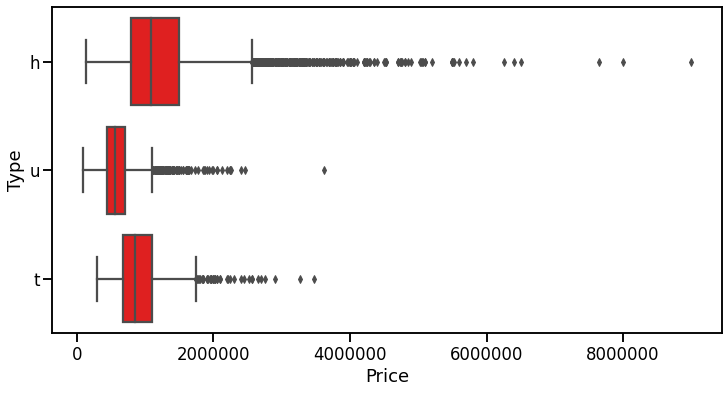

In [ ]:
#para ver que hay outliers
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=melb_df[['Type','Price']], x='Price', y='Type',color='red')
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
#IQR outliers removal (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)


def remover_outliers(df_data, col_name, factor_iqr):    
    q25 = df_data[col_name].quantile(0.25)
    q75 = df_data[col_name].quantile(0.75)
    iqr = q75 - q25  # interquartile range
    lim_inf = q25 - factor_iqr * iqr
    lim_sup = q75 + factor_iqr * iqr
    #df_inliers son los que quedan
    df_inliers = df_data.loc[
        (df_data[col_name] > lim_inf) & (df_data[col_name] < lim_sup)
    ]
    df_outliers = df_data.loc[
        (df_data[col_name] < lim_inf) | (df_data[col_name] > lim_sup)
    ]
    return df_inliers, df_outliers


In [ ]:
factor_iqr = 2
df_inliers, df_outliers = remover_outliers(melb_df, "Price", factor_iqr)

display(len(df_inliers) / len(melb_df))
display(len(df_outliers)/ len(melb_df))

0.9728276877761414

0.027098674521354935

In [ ]:
factor_iqr = 2.5
df_inliers, df_outliers = remover_outliers(melb_df, "Price", factor_iqr)

display((len(df_inliers) / len(melb_df))*100)
display(len(df_outliers)/ len(melb_df)*100)

98.46833578792342

1.531664212076583

CON UN IQR DE 2.5 todavia se RETIENE un 98.5% de los datos

In [ ]:
len(df_inliers), len(melb_df) 
#se pierden 208 datos , quedan 13372 
#len(melb_df)-len(df_inliers), len(df_inliers)

(13372, 13580)

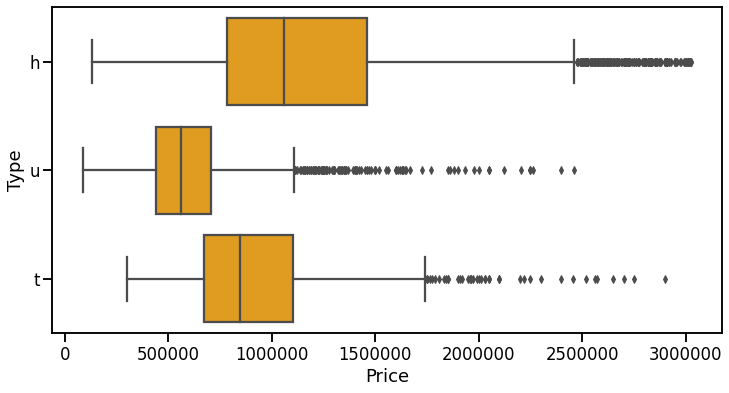

In [ ]:
#PLOTEAMOS SIN outliers
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_inliers[['Type','Price']], x='Price', y='Type',color='orange')
plt.ticklabel_format(style='plain', axis='x')

con panda.crosstab 
Calculamos una simple tabulación cruzada de dos (o más) factores. De forma predeterminada, calcula una tabla de frecuencia de los factores a menos que se
pasen una matriz de valores y una función de agregación.

In [ ]:
Bedroom2 = df_inliers.Bedroom2
Rooms = df_inliers.Rooms
pandas.crosstab(Rooms, Bedroom2)

Bedroom2,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0
Rooms,,,,,,,,,,,,
1,0,663,16,2,0,0,0,0,0,0,0,0
2,5,21,3535,73,8,1,0,0,0,0,0,0
3,8,5,160,5604,70,5,0,0,0,1,0,1
4,3,2,19,172,2371,15,0,0,0,1,0,0
5,0,0,1,15,32,478,2,1,1,0,0,0
6,0,0,0,1,4,1,56,1,0,0,0,0
7,0,0,0,0,0,2,0,7,0,0,0,0
8,0,0,0,0,1,0,2,0,4,1,0,0
10,0,0,0,0,0,0,0,0,0,0,1,0


## **PUEDE VERSE QUE Bedroom2 esta altamente asociada a Rooms por lo que se podría eliminar**

In [ ]:
df_inliers_copy=df_inliers.copy()
df_inliers_copy=df_inliers_copy.drop(['Bedroom2'], axis=1)
df_inliers_copy.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3851,Malvern East,19 Belson St,4,h,2800000.0,S,Marshall,12/11/2016,11.2,3145.0,2.0,3.0,809.0,NaN,1925.0,Stonnington,-37.8664,145.0452,Southern Metropolitan,8801.0
407,Ashburton,19 Poulter St,3,h,1650000.0,S,Marshall,28/08/2016,11.0,3147.0,1.0,1.0,697.0,164.0,1947.0,Boroondara,-37.8636,145.0903,Southern Metropolitan,3052.0
25,Abbotsford,49 Park St,2,h,1315000.0,S,Marshall,19/11/2016,2.5,3067.0,1.0,0.0,147.0,85.0,1900.0,Yarra,-37.8080,144.9940,Northern Metropolitan,4019.0
4413,Northcote,12/20 Ross St,1,u,435000.0,S,Nelson,10/09/2016,5.5,3070.0,1.0,2.0,0.0,55.0,1970.0,Darebin,-37.7842,144.9991,Northern Metropolitan,11364.0
7379,South Kingsville,42 Watt St,4,h,930000.0,S,Sweeney,4/06/2016,9.1,3015.0,1.0,3.0,669.0,143.0,1950.0,Hobsons Bay,-37.8305,144.8736,Western Metropolitan,984.0


In [ ]:
len(df_inliers_copy.axes[1]), len(melb_df.axes[1])
#PARA VER QUE SE ELIMINO UNA COLUMNA


(20, 21)

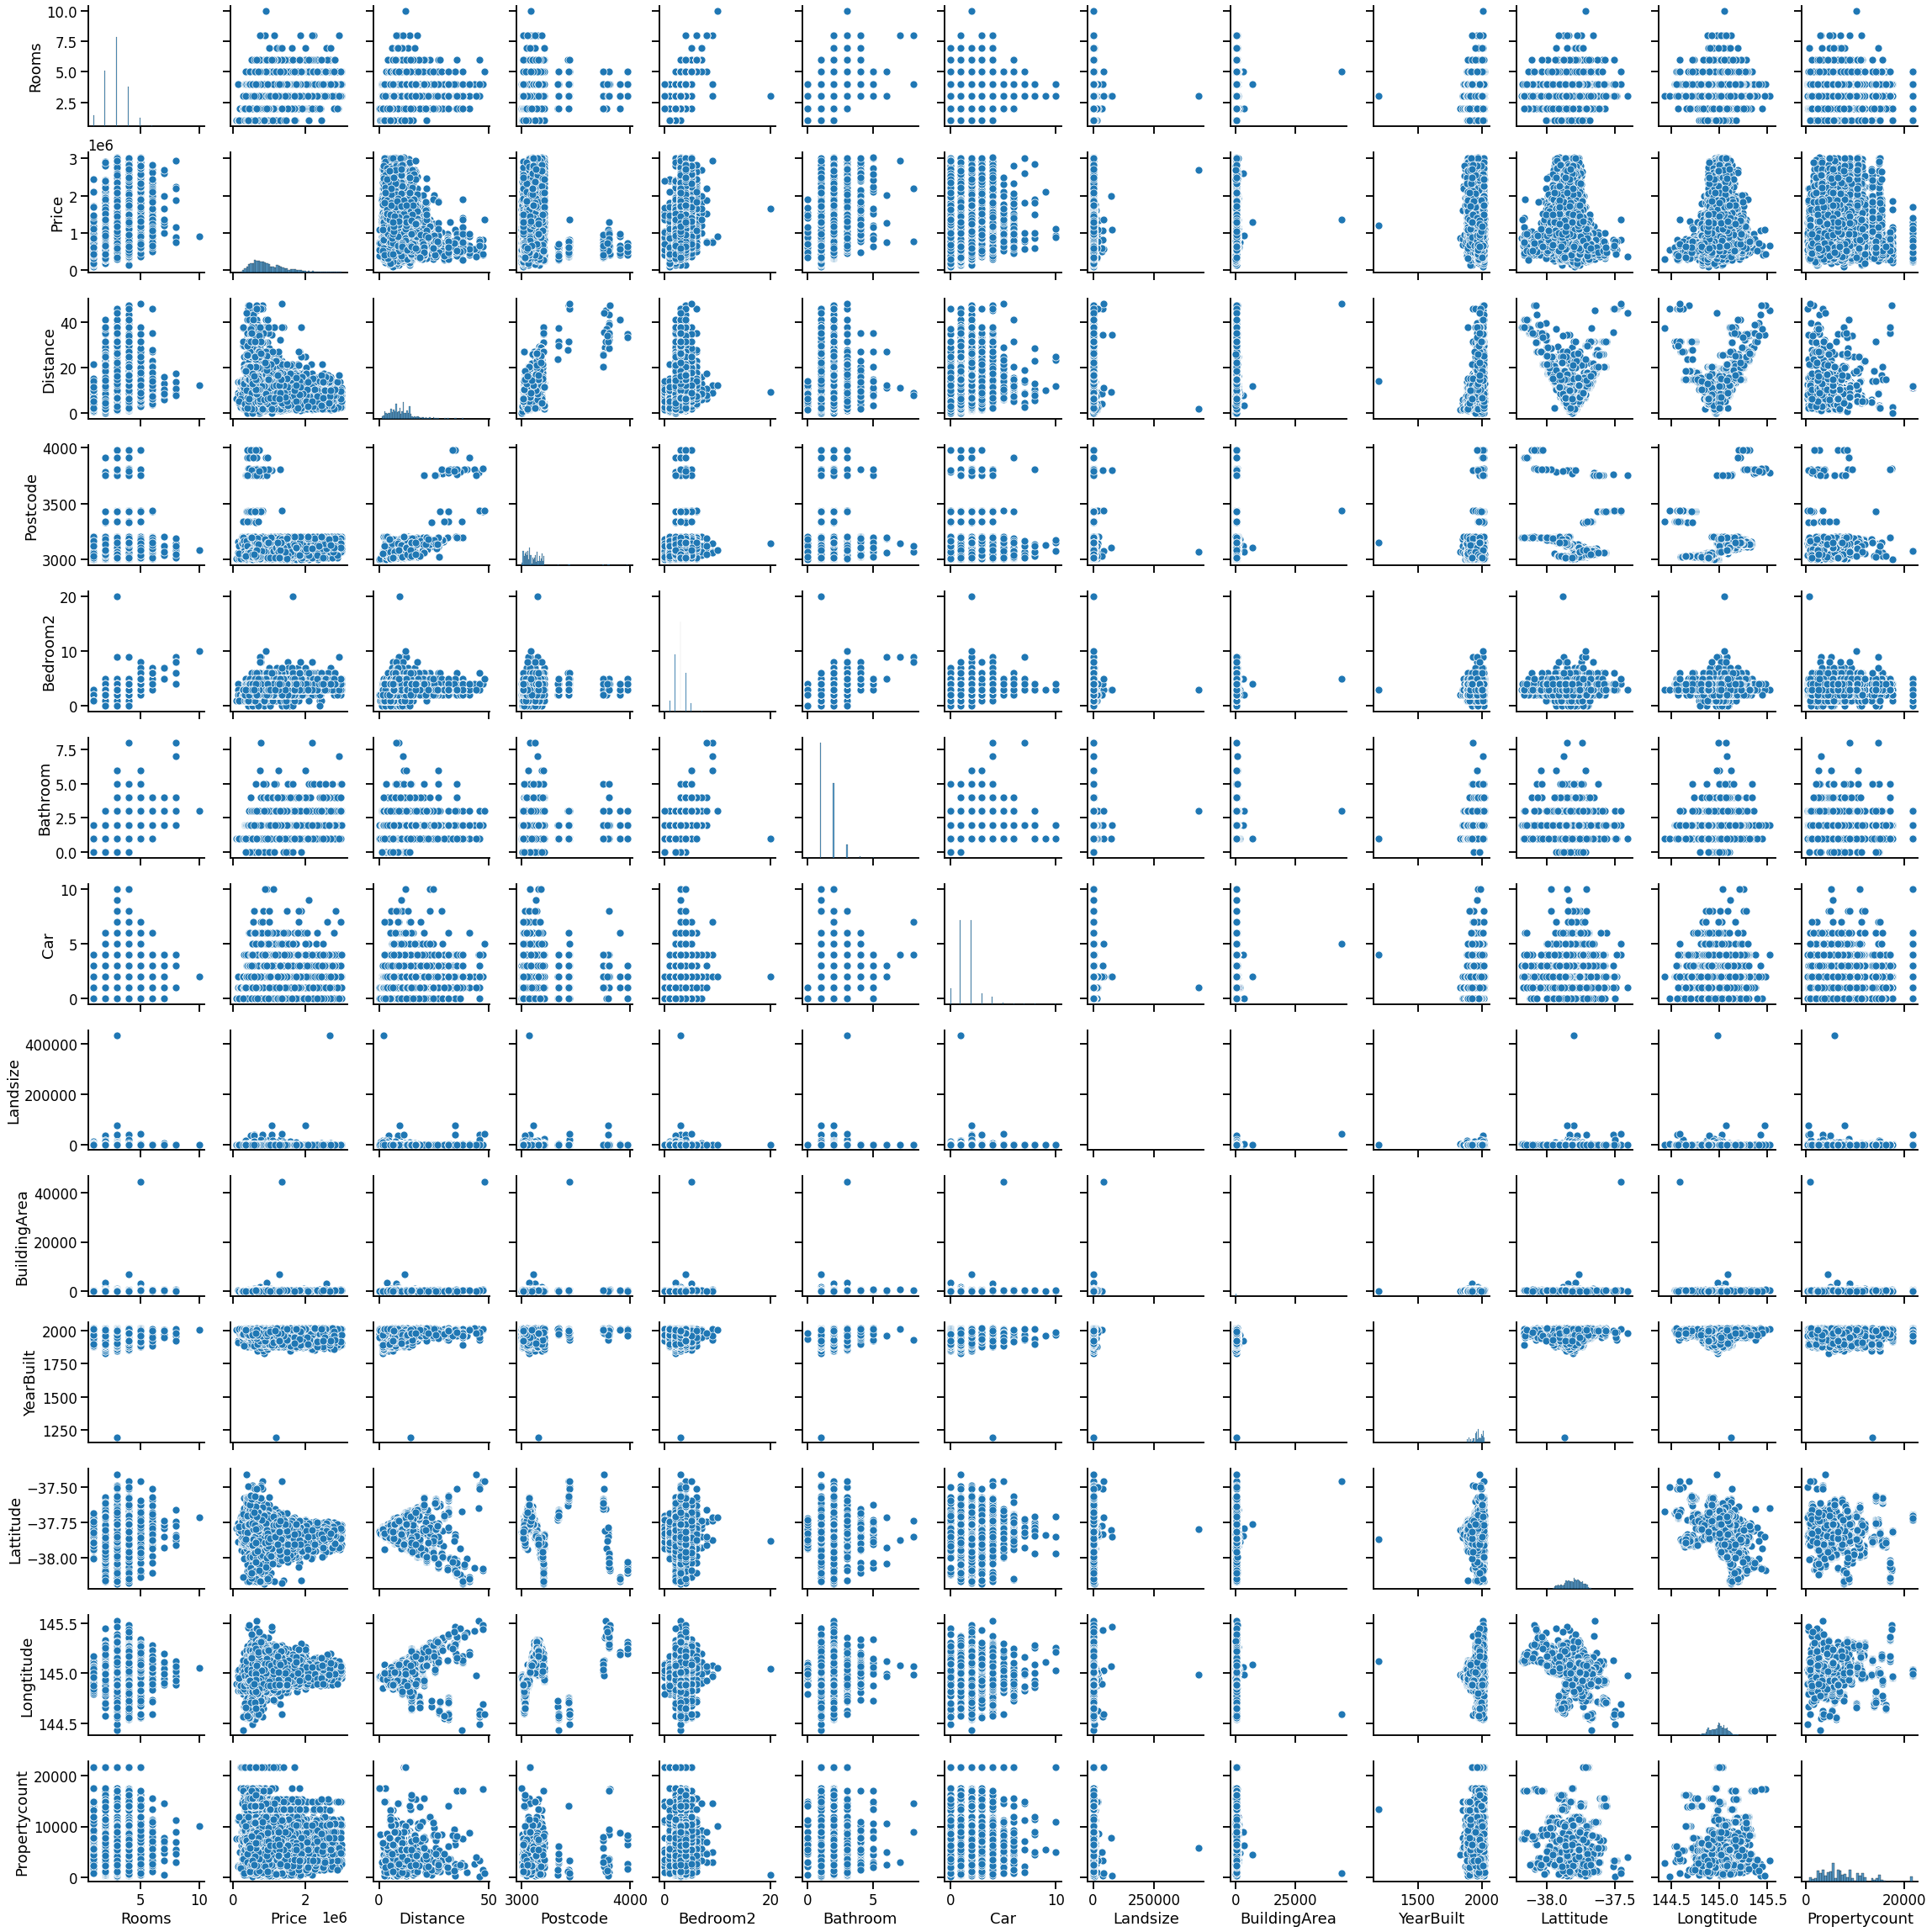

In [ ]:
seaborn.pairplot(
    df_inliers
)

In [ ]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
airbnb_df[:3]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369


## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.